<h2><u>Assignment 2 - MTL 782</u></h2>
<p>Submitted by:</p>
<table>
  <thead>
    <th>Name</th>
    <th>Entry No.</th>
  </thead>
  <tr>
    <td>Jatin Kumar</td>
    <td>2021MT60964</td>
  </tr>
  <tr>
    <td>Vishal Gupta</td>
    <td>2021MT60955</td>
  </tr>
  <tr>
    <td>Tanisha Jangra</td>
    <td>2021MT10927</td>
  </tr>
</table>
</code>

### **Q1(a),Q1(b)  MNIST Handwritten digits DATASET**

In [3]:
pip install tensorflow_decision_forests==1.8.0


In [4]:
import tensorflow as tf, tensorflow_decision_forests as tfdf, keras, numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt, matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
# Normalization of images, dividing the values by 255
X_test = X_test.astype('float') / 255.0
X_train = X_train.astype('float') / 255.0

In [ ]:
# shape of training set
X_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [ ]:
# shape of test set
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

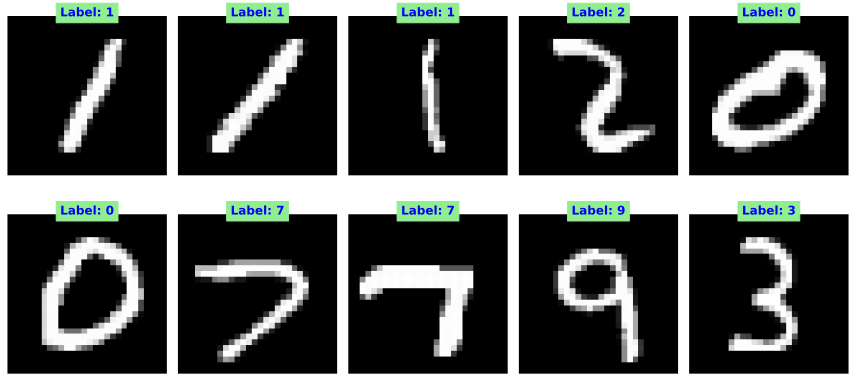

In [ ]:

num_images = 10

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

for i in range(num_images):
    idx = np.random.randint(X_train.shape[0])
    ax[i // 5, i % 5].imshow(X_train[idx], cmap="gray")
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(f"Label: {y_train[idx]}", y=0.96, fontdict={'color': 'blue', 'fontsize': 12, 'fontweight': 'bold'}, backgroundcolor="#90EE90")

plt.tight_layout()
plt.show()

In [7]:
# Flatten the images
X_trainf = X_train.reshape(X_train.shape[0], -1)
X_testf = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# Training and evaluation loop using K-Fold Cross Validation for Multinomial Naive Bayes, and KNN
models_sKlearn = [MultinomialNB, KNeighborsClassifier]

for model_class in models_sKlearn:
  # Instantiate and train the model
  model = model_class().fit(X_train.reshape(X_train.shape[0], -1), y_train)
  # Make predictions
  y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

  # Calculate and print accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model: {model_class.__name__}, Accuracy: {accuracy}")


Model: MultinomialNB, Accuracy: 0.8357
Model: KNeighborsClassifier, Accuracy: 0.9688


In [ ]:
for model_class in models_sKlearn:
  model = model_class().fit(X_trainf, y_train)
  # Make predictions
  y_pred = model.predict(X_testf)
  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')
  logloss = log_loss(y_test, model.predict_proba(X_testf))

  # Print evaluation metrics
  print(f"Model: {model_class.__name__}")
  print(f"Accuracy: {accuracy}")
  print("Confusion Matrix:")
  print(confusion)
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1}")
  print(f"Log Loss: {logloss}")
  print("\n")


Model: MultinomialNB
Accuracy: 0.8357
Confusion Matrix:
[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   14   41   27]
 [   2    2    6    0  731    0   25    1   38  177]
 [  23   12    6  108   18  586   17    6   79   37]
 [  18   13   17    1    8   24  859    0   18    0]
 [   1   21   11    5   18    0    1  861   41   69]
 [   6   26   13   55   14   27    8    9  776   40]
 [   6    8    3   11   65    9    1   18   27  861]]
Precision: 0.8428588561500527
Recall: 0.8325966614108935
F1-score: 0.8342123721010664
Log Loss: 2.0137301082758565


Model: KNeighborsClassifier
Accuracy: 0.9688
Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0

In [ ]:
from keras import layers, models

input_layer = layers.Input(shape=(28, 28))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=256, activation="relu")(x)
x = layers.Dropout(0.5)(x)  # Adding dropout for regularization
x = layers.Dense(units=128, activation="relu")(x)
output_layer = layers.Dense(units=10, activation="softmax")(x)

model = models.Model(input_layer, output_layer)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (91

In [ ]:
from keras import utils, optimizers

opt = optimizers.Adam(learning_rate = 5e-4)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
model.fit(X_train, utils.to_categorical(y_train, 10), epochs = 10, shuffle = True) # One-hot encode the resultant y output and then we will take argmax of probability
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert labels to categorical format
y_test_categorical = utils.to_categorical(y_test, 10)

# Calculate evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test_categorical, y_pred_prob)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3594 - accuracy: 0.8928
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1787 - accuracy: 0.9466
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1415 - accuracy: 0.9567
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1205 - accuracy: 0.9633
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1069 - accuracy: 0.9669
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0963 - accuracy: 0.9695
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0892 - accuracy: 0.9702
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0827 - accuracy: 0.9743
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0780 - accuracy: 0.9751
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
Confu

In [ ]:
# Now check the test accuracy of the model
model_info = model.evaluate(X_test, utils.to_categorical(y_test, 10))
print("Model:", model_info[0], ", Accuracy:", model_info[1])


313/313 [==============================] - 3s 7ms/step - loss: 0.0711 - accuracy: 0.9786
Model: 0.07105590403079987 , Accuracy: 0.978600025177002


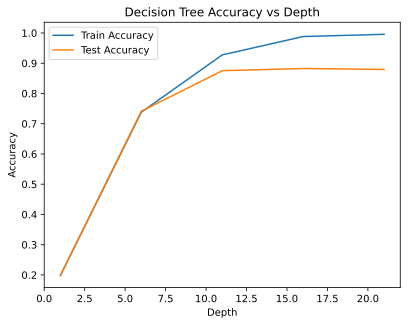

In [ ]:
#  Find the best depth for the tree and plot accuracy vs depth
depth_values = range(1, 26, 5)
train_scores = []
test_scores = []

for depth in depth_values:
    dt =  DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_trainf, y_train)
    train_score = dt.score(X_trainf, y_train)
    test_score = dt.score(X_testf, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(depth_values, train_scores, label='Train Accuracy')
plt.plot(depth_values, test_scores, label='Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth')
plt.legend()
plt.show()


In [ ]:
# best depth calculation
best_depth = depth_values[np.argmax(test_scores)]

dt_classifier = DecisionTreeClassifier(max_depth=best_depth)
dt_classifier.fit(X_trainf, y_train)

y_pred = dt_classifier.predict(X_testf)

# Evaluation of model using different metrics
conf_matrix = confusion_matrix(y_test, y_pred)
evaluation_metrics = {
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1-score': f1_score(y_test, y_pred, average='macro'),
    'Accuracy': accuracy_score(y_test, y_pred),
    'Log Loss': log_loss(y_test, dt_classifier.predict_proba(X_testf))
}

# Printing evaluation metrics
print("Confusion Matrix for the dataset:")
print(conf_matrix)
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

# Cross-validation
mean_cv_accuracy = np.mean(cross_val_score(dt_classifier, np.concatenate((X_trainf, X_testf)), np.concatenate((y_train, y_test)), cv=5))
print(f"Cross-validation accuracy for best depth ({best_depth}): {mean_cv_accuracy:.4f}")


Confusion Matrix for the dataset:
[[ 927    1    4    7    4   12    9    4    6    6]
 [   2 1092   13    6    2    3    5    3    8    1]
 [   9    7  887   33   11   15   14   26   23    7]
 [  10    5   21  867    7   42    3   10   29   16]
 [  12    2   11    3  861   14   16    8   19   36]
 [  13    8    7   34    9  753   23    6   21   18]
 [  19    4   11    8   14   20  852    1   25    4]
 [   2   10   23   15    8    5    0  940    6   19]
 [  11    6   27   40   18   26   17    6  791   32]
 [  14    3    7   18   45   10    5   15   24  868]]
Precision: 0.882157339606559
Recall: 0.8823019727523909
F1-score: 0.8821566891653525
Accuracy: 0.8838
Log Loss: 3.746838511131337
Cross-validation accuracy for best depth (16): 0.8752


In [ ]:
from sklearn.model_selection import KFold
import pandas as pd

depth_values = range(1, 26, 5)
n_estimators_values = range(10, 51, 10)

best_accuracy = 0.0
best_depth = None
best_n_estimators = None

train_accs = []
test_accs = []

In [ ]:
from itertools import product

# Find best hyper-parameters from all combinations of hyper-parameters
for depth in depth_values:
    for n_estimators in n_estimators_values:
      # Create and train Random Forest classifier
      model_rf = tfdf.keras.RandomForestModel(num_trees=n_estimators, max_depth=depth)
      model_rf.fit(X_trainf, y_train)

      # Compute train and test accuracies
      model_rf.compile(metrics=['accuracy'])
      train_accuracy = model_rf.evaluate(X_trainf, y_train, return_dict=True)
      test_accuracy = model_rf.evaluate(X_testf, y_test, return_dict=True)

      # Append accuracies for plotting
      train_accs.append((depth, n_estimators, train_accuracy))
      test_accs.append((depth, n_estimators, test_accuracy))

      # Check if current combination achieves better accuracy
      accuracy_value = test_accuracy['accuracy']
      if float(accuracy_value) > best_accuracy:
          best_accuracy = accuracy_value
          best_depth = depth
          best_n_estimators = n_estimators


Use /tmp/tmpjd3_nr_g as temporary training directory
Reading training dataset...
Training dataset read in 0:00:20.091922. Found 60000 examples.
Training model...
Model trained in 0:00:05.034753
Compiling model...
Model compiled.
313/313 [==============================] - 4s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1135
Use /tmp/tmpos2diq3_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:16.338073. Found 60000 examples.
Training model...
Model trained in 0:00:03.733051
Compiling model...
Model compiled.
313/313 [==============================] - 5s 8ms/step - loss: 0.0000e+00 - accuracy: 0.1135
Use /tmp/tmpn1ovwuhk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:15.127726. Found 60000 examples.
Training model...
Model trained in 0:00:04.594095
Compiling model...
Model compiled.
313/313 [==============================] - 5s 8ms/step - loss: 0.0000e+00 - accuracy: 0.1135
Use /tmp/tmpwv4a5qfd as temporary 

Training dataset read in 0:00:14.852060. Found 60000 examples.
Training model...
Model trained in 0:00:03.932576
Compiling model...


Model compiled.


313/313 [==============================] - 4s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1135
Use /tmp/tmp4e0w2otw as temporary training directory
Reading training dataset...


Training dataset read in 0:00:14.649874. Found 60000 examples.
Training model...
Model trained in 0:00:07.197870
Compiling model...


Model compiled.


313/313 [==============================] - 5s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7910
Use /tmp/tmprpckqhwa as temporary training directory
Reading training dataset...
Training dataset read in 0:00:16.118883. Found 60000 examples.
Training model...
Model trained in 0:00:09.704309
Compiling model...
Model compiled.
313/313 [==============================] - 7s 13ms/step - loss: 0.0000e+00 - accuracy: 0.8442
Use /tmp/tmpdzqepbqh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:17.185849. Found 60000 examples.
Training model...
Model trained in 0:00:12.336848
Compiling model...
Model compiled.
313/313 [==============================] - 4s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8515
Use /tmp/tmp7obkxjmv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:15.993416. Found 60000 examples.
Training model...
Model trained in 0:00:14.701140
Compiling model...
Model compiled.
313/313 [========================

In [ ]:
from keras.utils import to_categorical

# Create and train Random Forest classifier with best hyperparameters
model_rf_best = tfdf.keras.RandomForestModel(num_trees=best_n_estimators, max_depth=best_depth)
model_rf_best.fit(X_trainf, y_train)

# Make predictions
y_pred_prob_best = model_rf_best.predict(X_testf)
y_pred_best = np.argmax(y_pred_prob_best, axis=1)

# Calculate evaluation metrics
evaluation_metrics_best = {
    'Precision': precision_score(y_test, y_pred_best, average='macro'),
    'Recall': recall_score(y_test, y_pred_best, average='macro'),
    'F1-score': f1_score(y_test, y_pred_best, average='macro'),
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Log Loss': log_loss(to_categorical(y_test, 10), y_pred_prob_best)
}

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
for metric, value in evaluation_metrics_best.items():
    print(f"{metric}: {value}")


Use /tmp/tmp1bw4d6x9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:24.739602. Found 60000 examples.
Training model...
Model trained in 0:01:42.642641
Compiling model...
Model compiled.
313/313 [==============================] - 4s 6ms/step
Confusion Matrix:
[[ 973    0    2    0    0    1    1    1    2    0]
 [   0 1122    2    5    0    2    2    1    1    0]
 [   6    0  996    7    3    1    4    9    6    0]
 [   1    0   11  971    0    7    0   12    8    0]
 [   0    0    3    0  957    0    6    0    3   13]
 [   4    0    1   14    3  855    6    2    5    2]
 [  13    3    1    0    5    2  932    0    2    0]
 [   1    3   22    2    1    1    0  987    3    8]
 [   6    0    6    9    3    6    7    4  923   10]
 [   8    5    2   12   15    5    1    4    5  952]]
Precision: 0.9666564868691765
Recall: 0.9665091631603998
F1-score: 0.9665239202055282
Accuracy: 0.9668
Log Loss: 0.22337506609482813


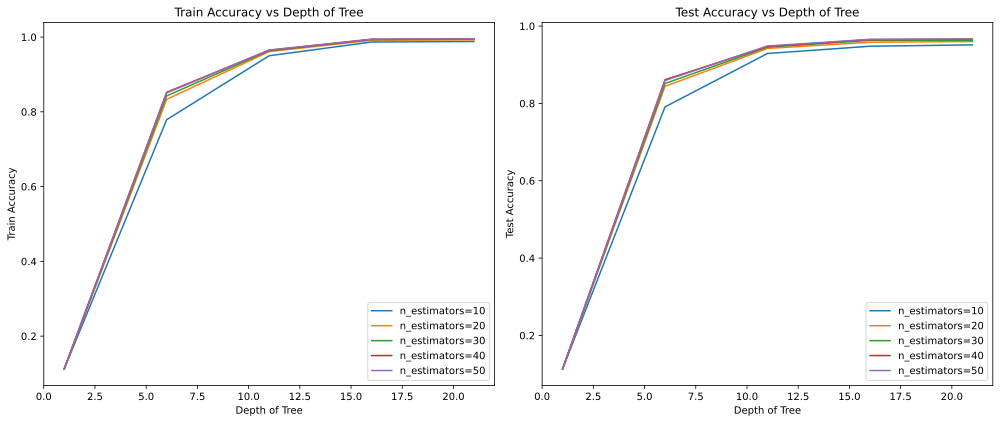

In [ ]:
# Plot accuracy vs depth of tree
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy vs depth of tree
for n_estimators in n_estimators_values:
    accuracies = [acc for acc in train_accs if acc[1] == n_estimators]
    depths = [acc[0] for acc in accuracies]
    train_accs1 = [acc[2]['accuracy'] for acc in accuracies]
    axes[0].plot(depths, train_accs1, label=f'n_estimators={n_estimators}')
    axes[0].set_xlabel('Depth of Tree')
    axes[0].set_ylabel('Train Accuracy')
    axes[0].set_title('Train Accuracy vs Depth of Tree')
    axes[0].legend()

for n_estimators in n_estimators_values:
    accuracies = [acc for acc in test_accs if acc[1] == n_estimators]
    depths = [acc[0] for acc in accuracies]
    test_accs1 = [acc[2]['accuracy'] for acc in accuracies]
    axes[1].plot(depths, test_accs1, label=f'n_estimators={n_estimators}')
    axes[1].set_xlabel('Depth of Tree')
    axes[1].set_ylabel('Test Accuracy')
    axes[1].set_title('Test Accuracy vs Depth of Tree')
    axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Print best parameters
print("Best Parameters:")
print("Max Depth:", best_depth)
print("Number of Estimators:", best_n_estimators)

# Use K-fold cross-validation to evaluate the model
kfold = KFold(n_splits=10)
mean_cv_accuracy = 0

Best Parameters:
Max Depth: 21
Number of Estimators: 50


### **Q1(c) Parameter Tuning through Grid Search/Cross Validation**


In [ ]:
# Define the parameteric grid for grid-search cv
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Adjust the range as needed
}

# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainf, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the best parameters and best accuracy
print("Best Parameters for Decision Tree:", best_params)
print("Best Accuracy for Decision Tree:", best_accuracy)



Best Parameters for Decision Tree: {'max_depth': 15}
Best Accuracy for Decision Tree: 0.8703833333333334


In [8]:
# parameter search
# Define the hyperparameter search space
import numpy as np
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.random.randint(1, 20, size=50)),
    'min_samples_split': np.random.randint(2, 20, size=50),
    'min_samples_leaf': np.random.randint(1, 20, size=50),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
# Create a base model
dt = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=10)

# Perform the random search
random_search.fit(X_trainf, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

# Print the best parameters and best accuracy
print("Best Parameters for Decision Tree:", best_params)
print("Best Accuracy for Decision Tree:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 17, 'criterion': 'entropy'}
Best Accuracy for Decision Tree: 0.8727
